<a href="https://colab.research.google.com/github/tabassum-laz/Artificial-Intelligence-Lab/blob/main/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/AI lab/carprices.csv")
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [4]:
df.head()

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [5]:
df.tail()

,Car Model,Mileage,Sell Price,Age
11,Mercedez Benz,79000,21000,7
12,Mercedez Benz,59000,33000,5
13,Toyota,51000,42000,4
14,Toyota,65000,32000,7
15,Toyota,39000,55000,5


In [6]:
df.shape

(16, 4)

In [7]:
df.isnull().sum()

Car Model     0
Mileage       0
Sell Price    0
Age           0
dtype: int64

In [8]:
df.columns

Index(['Car Model', 'Mileage', 'Sell Price', 'Age'], dtype='object')

In [9]:
x=df[['Sell Price']].values
y=df['Age']

In [10]:
x

array([[18000],
       [34000],
       [26100],
       [40000],
       [31500],
       [29400],
       [32000],
       [19300],
       [12000],
       [22000],
       [20000],
       [21000],
       [33000],
       [42000],
       [32000],
       [55000]])

In [11]:
y

0     6
1     3
2     5
3     2
4     4
5     5
6     5
7     6
8     8
9     6
10    7
11    7
12    5
13    4
14    7
15    5
Name: Age, dtype: int64

In [12]:
x.max

<function ndarray.max>

In [14]:
dummies=pd.get_dummies(df['Car Model'])
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [16]:
merged=pd.concat([df,dummies],axis='columns')
merged

,Car Model,Mileage,Sell Price,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,BMW X5,69000,18000,6,0,1,0,0
1,BMW X5,35000,34000,3,0,1,0,0
2,BMW X5,57000,26100,5,0,1,0,0
3,BMW X5,22500,40000,2,0,1,0,0
4,BMW X5,46000,31500,4,0,1,0,0
5,Audi,59000,29400,5,1,0,0,0
6,Audi,52000,32000,5,1,0,0,0
7,Audi,72000,19300,6,1,0,0,0
8,Audi,91000,12000,8,1,0,0,0
9,Mercedez Benz,67000,22000,6,0,0,1,0


In [20]:
final=merged.drop(['Car Model'],axis='columns')

In [23]:
y=final['Sell Price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

In [28]:
X= final[['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ','Toyota']]

In [29]:
final.shape

(16, 7)

In [30]:
final.columns

Index(['Mileage', 'Sell Price', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ',
       'Toyota'],
      dtype='object')

In [31]:
X

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [36]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

array([43580.37257019, 45795.84233261, 22638.71490281, 23759.55723542,
       33463.98488121])

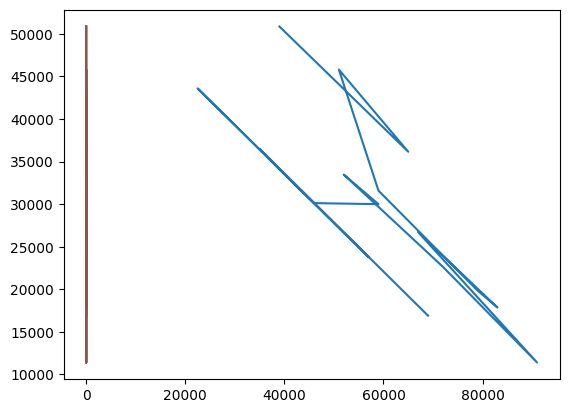

In [38]:
plt.plot(X,reg.predict(X))

In [39]:
reg.coef_

array([-4.96274298e-01, -8.99784017e+02, -1.32474352e+03, -8.54779968e+03,
        2.61487581e+02,  9.61105562e+03])

In [40]:
reg.intercept_

65093.911987041036

In [41]:
reg.score(X_test,y_test)

0.8722448586655194

In [42]:
reg.predict([[72000,4,0,0,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35374.08207343])